In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [44]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [15]:
df = pd.read_csv('london.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [7]:
df['timestamp'].to_datetime()

AttributeError: 'Series' object has no attribute 'to_datetime'

In [16]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [17]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [33]:
t1 = df.groupby('timestamp',as_index=False).agg({'cnt':'sum'})

In [34]:
t1

,timestamp,cnt
0,2015-01-04 00:00:00,182
1,2015-01-04 01:00:00,138
2,2015-01-04 02:00:00,134
3,2015-01-04 03:00:00,72
4,2015-01-04 04:00:00,47
...,...,...
17409,2017-01-03 19:00:00,1042
17410,2017-01-03 20:00:00,541
17411,2017-01-03 21:00:00,337
17412,2017-01-03 22:00:00,224


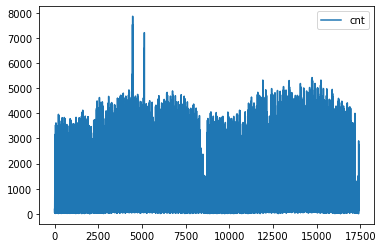

In [37]:
sns.lineplot(data=t1)

In [39]:
t2 = df.sort_values('timestamp').set_index(df.timestamp).drop('timestamp',axis=1)

In [41]:
t2

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [46]:
tt2 = t2.resample(rule='D').agg({'cnt':'sum'})

In [126]:
ttt2 = tt2.reset_index()

In [127]:
ttt2

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


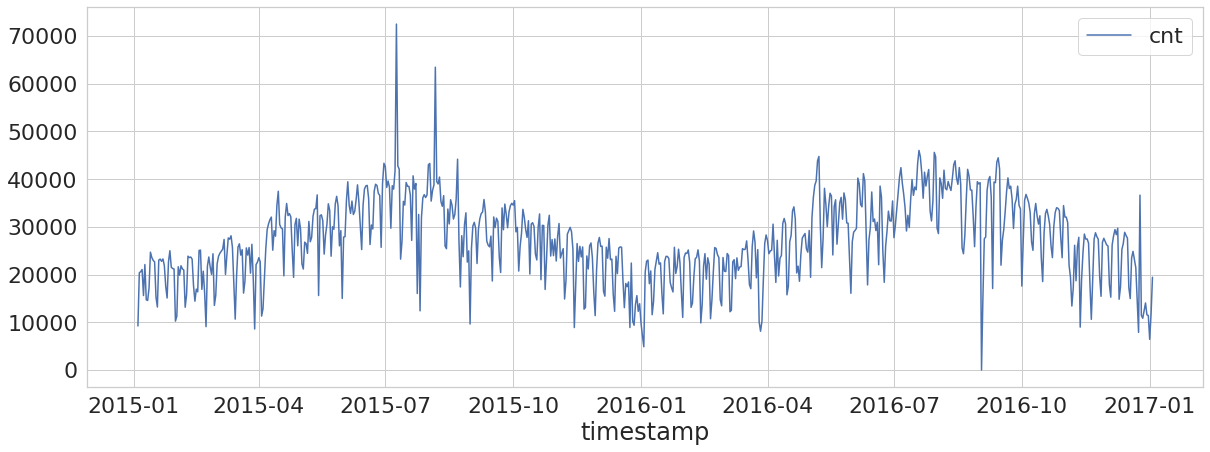

In [47]:
sns.lineplot(data=tt2)

In [55]:
t3 = tt2.rolling(window=3).mean().reset_index()

In [56]:
t3.query('timestamp == "2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


In [76]:
t3

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


In [86]:
ttt2 = tt2.reset_index()

In [89]:
tets = round(np.std(ttt2.cnt - t3.cnt),2)

In [90]:
tets

4558.59

In [94]:
t3

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


In [114]:
t3['upper_bound'] = t3.cnt + (2.576 * np.std(t3.cnt))

In [115]:
t3['lower_bound'] = t3.cnt - (2.576 * np.std(t3.cnt))

In [116]:
t3

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN
2,2015-01-06,16739.666667,36115.371175,-2636.037842
3,2015-01-07,20683.000000,40058.704508,1307.295492
4,2015-01-08,19092.666667,38468.371175,-283.037842
...,...,...,...,...
726,2016-12-30,12682.000000,32057.704508,-6693.704508
727,2016-12-31,12347.333333,31723.037842,-7028.371175
728,2017-01-01,9803.666667,29179.371175,-9572.037842
729,2017-01-02,9889.333333,29265.037842,-9486.371175


In [107]:
round(31935.704508,2)

31935.7

In [117]:
np.std(t3.cnt)

7521.624420877508

In [128]:
t3['orig'] = ttt2.cnt

In [129]:
t3

,timestamp,cnt,upper_bound,lower_bound,orig
0,2015-01-04,NaN,NaN,NaN,9234
1,2015-01-05,NaN,NaN,NaN,20372
2,2015-01-06,16739.666667,36115.371175,-2636.037842,20613
3,2015-01-07,20683.000000,40058.704508,1307.295492,21064
4,2015-01-08,19092.666667,38468.371175,-283.037842,15601
...,...,...,...,...,...
726,2016-12-30,12682.000000,32057.704508,-6693.704508,11566
727,2016-12-31,12347.333333,31723.037842,-7028.371175,11424
728,2017-01-01,9803.666667,29179.371175,-9572.037842,6421
729,2017-01-02,9889.333333,29265.037842,-9486.371175,11823


In [131]:
t3.query('"orig" > "upper_bound"')

KeyError: False